   Temp  Humd  Label
0    28    38      1
1    27    33      1
2    28    71      1
3    28    72      1
4    28    72      1
Missing Values:
Temp     0
Humd     0
Label    0
dtype: int64
KNearestNeighbors Accuracy: 0.9221556886227545
LogisticRegression Accuracy: 0.8323353293413174
RandomForest Accuracy: 0.9401197604790419


Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

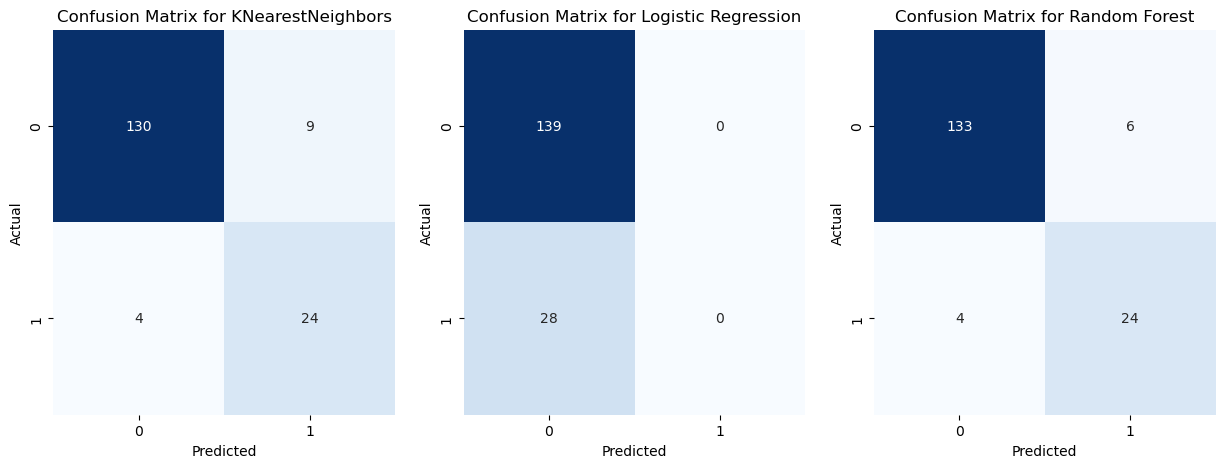

In [16]:
# Load class
import numpy as np
import pandas as pd # In case it's not installed then install using conda create -c conda-forge -n name_of_my_env python pandas
# More installations information can be found: https://pandas.pydata.org/docs/getting_started/install.html
import os
# Load sklearn module for creating and evaluating ML models. In case sklearn isn't installed, follow this link https://scikit-learn.org/stable/install.html for further details on the installation process.

from sklearn.neighbors import KNeighborsClassifier # Load your classifier. In this code, I have used KNN. You can choose other algorithms. You have to use at least 3 to complete this.
from sklearn.preprocessing import StandardScaler # Module for perform scaling

from sklearn.model_selection import train_test_split # Module for splitting datatset
from sklearn import metrics # Module for evaluating performance

# Load your data
df = pd.read_csv("data.csv") # Change the name accordingly
print(df.head()) # Prints top 5 rows from the datatset to check data is load or not

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Remove duplicatesd
df = df.drop_duplicates()

# Prepare features
x = df.drop(['Label'],axis=1) # Remove class or label
y = df['Label'] # Load label

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2) # Split datatset. Here ratio is 80:20. Change accordingly.

# Scale the data using standardization
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) # Scale training set
x_test = scaler.transform(x_test) # Scale test set

KNN = KNeighborsClassifier(n_neighbors=3) # KNN classifier for 3 neighbours
KNN = z.fit(x_train,y_train) # Start training
KNN_preds = KNN.predict(x_test) # Performance in the test set
KNN_acc = metrics.accuracy_score(y_test, KNN_preds)
print("KNearestNeighbors Accuracy:", KNN_acc)

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg_preds = log_reg.predict(x_test)
log_reg_acc = metrics.accuracy_score(y_test, log_reg_preds)
print("LogisticRegression Accuracy:", log_reg_acc)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_preds = rf.predict(x_test)
rf_acc = metrics.accuracy_score(y_test, rf_preds)
print("RandomForest Accuracy:", rf_acc)

# Library for save and load scikit-learn models
import pickle
# File name, recommending *.pickle as a file extension
filename1 = "modelGaussianNB.pickle"
filename2 = "modelLogisticRegression.pickle"
filename3 = "modelRandomForest.pickle"
# Save model
pickle.dump(KNN, open(filename1, "wb"))
pickle.dump(log_reg, open(filename2, "wb"))
pickle.dump(rf, open(filename3, "wb"))

# PLotting some confusion matricies to see performance
import seaborn as sns
import matplotlib.pyplot as plt
KNN_cm = metrics.confusion_matrix(y_test, KNN_preds)
log_reg_cm = metrics.confusion_matrix(y_test, log_reg_preds)
rf_cm = metrics.confusion_matrix(y_test, rf_preds)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.heatmap(KNN_cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[0])
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")
axes[0].set_title("Confusion Matrix for KNearestNeighbors")

sns.heatmap(log_reg_cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[1])
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")
axes[1].set_title("Confusion Matrix for Logistic Regression")

sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[2])
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")
axes[2].set_title("Confusion Matrix for Random Forest")